In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls  "/content/drive/My Drive/Mask_Datasets/"

Train  Validation


In [0]:
#define directory

base_dir = "/content/drive/My Drive/Mask_Datasets/"

train_dir = os.path.join(base_dir, "Train")
train_mask_dir = os.path.join(train_dir, "Mask")
train_no_mask_dir = os.path.join(train_dir, "No_mask")

val_dir = os.path.join(base_dir, "Validation")
val_mask_dir = os.path.join(val_dir, "Mask")
val_no_mask_dir = os.path.join(val_dir, "No_mask")


In [5]:
#Understanding the data

num_mask_train = len(os.listdir(train_mask_dir))
num_no_mask_train = len(os.listdir(train_no_mask_dir))
total_train = num_mask_train + num_no_mask_train

num_mask_val = len(os.listdir(val_mask_dir))
num_no_mask_val = len(os.listdir(val_no_mask_dir))
total_val = num_mask_val + num_no_mask_val

print("train data: mask ==> ", num_mask_train)
print("train data: no_mask ==> ", num_no_mask_train)
print("total train data ==> ", total_train)
print("                      ")
print("validation data: mask ==> ", num_mask_val)
print("validation data: no_mask ==> ", num_no_mask_val)
print("total validation data ==> ", total_val)


train data: mask ==>  350
train data: no_mask ==>  401
total train data ==>  751
                      
validation data: mask ==>  150
validation data: no_mask ==>  200
total validation data ==>  350


In [0]:
batch_size = 100
epochs = 10
IMG_WIDTH = 200
IMG_HEIGHT = 100

In [7]:
#Data Preparation

train_image_generator = ImageDataGenerator(
                          rescale=1./255, 
                          horizontal_flip=True,
                          rotation_range=45,
                          shear_range=0.2,
                          zoom_range=0.5,
                          width_shift_range=.15,
                          height_shift_range=.15,
                        )

train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary"
)

val_image_generator = ImageDataGenerator(rescale=1./255)

val_data_gen = val_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = val_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary"
)


Found 751 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


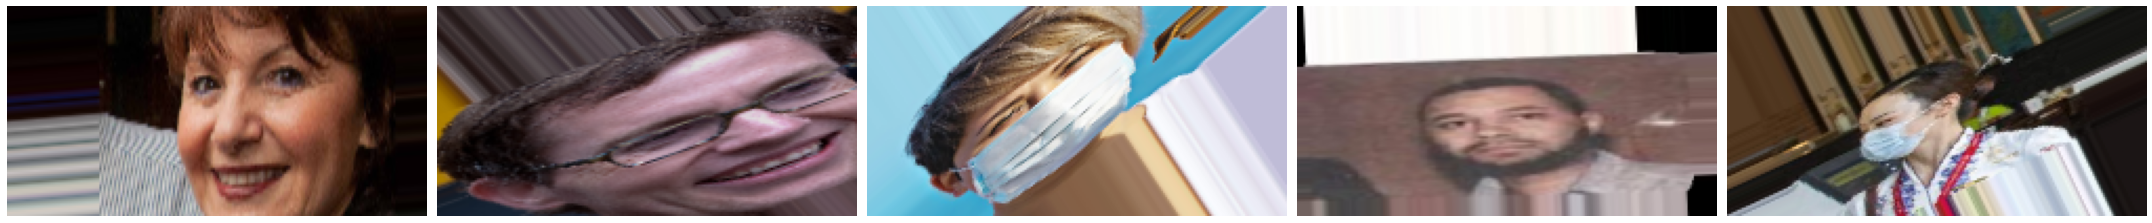

In [8]:
#visualize dataset
sample_training_image, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(30,30))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

plotImages(sample_training_image[:5])

In [0]:
#model

convolutional_block = convolutional_blocks = [
  Conv2D(16,(3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3,3), activation="relu"),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64,(3,3), activation="relu"),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(512, activation="relu"),
  Dense(1, activation="sigmoid")
]

model = Sequential(convolutional_blocks)

In [0]:
## compile

model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 198, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14720)             0

In [12]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= total_val // batch_size
)

Epoch 1/10
7/7 [==============================] - 357s 51s/step - loss: 0.6764 - accuracy: 0.5422 - val_loss: 0.6048 - val_accuracy: 0.8600
Epoch 2/10
7/7 [==============================] - 40s 6s/step - loss: 0.6102 - accuracy: 0.7573 - val_loss: 0.5250 - val_accuracy: 0.9100
Epoch 3/10
7/7 [==============================] - 40s 6s/step - loss: 0.5703 - accuracy: 0.8418 - val_loss: 0.5324 - val_accuracy: 0.8467
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 0.5726 - accuracy: 0.8186 - val_loss: 0.5315 - val_accuracy: 0.8567
Epoch 5/10
7/7 [==============================] - 41s 6s/step - loss: 0.5621 - accuracy: 0.8529 - val_loss: 0.5217 - val_accuracy: 0.9000
Epoch 6/10
7/7 [==============================] - 39s 6s/step - loss: 0.5827 - accuracy: 0.7942 - val_loss: 0.5034 - val_accuracy: 0.9433
Epoch 7/10
7/7 [==============================] - 40s 6s/step - loss: 0.5530 - accuracy: 0.8571 - val_loss: 0.5152 - val_accuracy: 0.9300
Epoch 8/10
7/7 [================

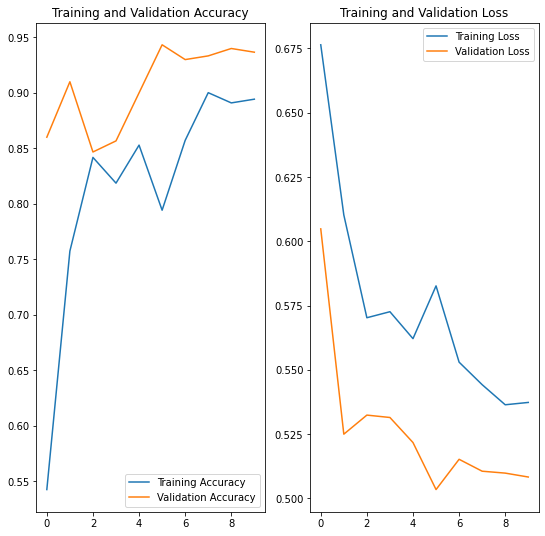

In [13]:
#plot loss & acc

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
evaluate = model.evaluate(val_data_gen, steps=total_val/batch_size)
print(evaluate)

4/3 [==================================] - 9s 2s/step - loss: 0.5128 - accuracy: 0.9371
[0.5127930641174316, 0.9371428489685059]
